In [14]:
# If using Google Colab, install the dependencies
# !pip install --upgrade numpy scipy matplotlib pandas seaborn scikit-learn umap-learn

In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data loading & exploration
We will use the s-curve dataset, starting by loading data from sklearn and running some visualization.

In [16]:
from sklearn.datasets import make_s_curve
n_points = 1000
X, color = make_s_curve(n_points, random_state=0)

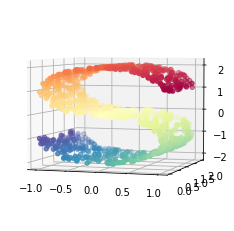

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

### Trying PCA on the dataset

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# normalize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# doing the PCA
pca = PCA(svd_solver='full')
pca.fit(X_norm)

# transformed features
X_pred = pca.transform(X_norm)

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

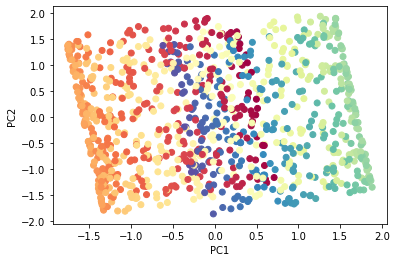

In [19]:
fig, ax = plt.subplots()
ax.scatter(X_pred[:, 0], X_pred[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set(xlabel="PC1", ylabel="PC2")

## Spectral embedding

In [20]:
from sklearn.manifold import SpectralEmbedding
se = SpectralEmbedding(n_components=2, n_neighbors=10)
X_pred = se.fit_transform(X)

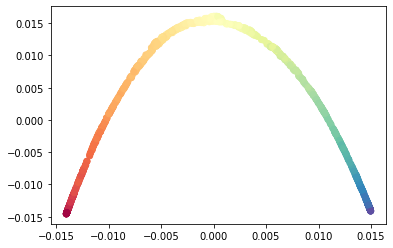

In [21]:
fig, ax = plt.subplots()
ax.scatter(X_pred[:, 0], X_pred[:, 1], c=color, cmap=plt.cm.Spectral)

## tSNE

In [22]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

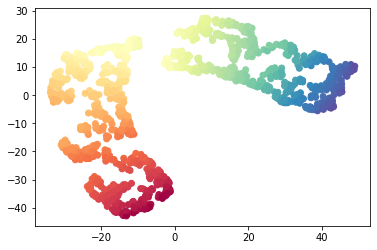

In [23]:
fig, ax = plt.subplots()
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color, cmap=plt.cm.Spectral)